<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_3_6)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.6_n20.csv',
 'data_add_delta_-3.6_n30.csv',
 'data_add_delta_-3.6_n60.csv',
 'data_add_delta_-3.6_n120.csv',
 'data_add_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,98.878303,87.976996,-0.000085,196.855213,196.855247,-0.000033
1,0.0,1.0,83.374980,35.010299,-0.000802,128.384477,128.385058,-0.000581
2,0.0,2.0,45.365111,30.885953,-0.001084,86.249980,86.251014,-0.001034
3,0.0,3.0,41.809173,60.989043,-0.000770,112.797445,112.798324,-0.000879
4,0.0,4.0,55.532205,97.225586,0.000017,162.757808,162.758000,-0.000192
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,34.512877,45.067147,0.001217,89.581241,89.580297,0.000944
119996,999.0,116.0,32.680571,83.927490,-0.000115,126.607947,126.607952,-0.000005
119997,999.0,117.0,97.529958,80.535114,0.000149,188.065222,188.065220,0.000002
119998,999.0,118.0,31.734642,56.001625,0.000069,97.736336,97.736425,-0.000089


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,98.878303,87.976996,-0.000085,196.855213,196.855247,-0.000033
1,0.0,1.0,83.374980,35.010299,-0.000802,128.384477,128.385058,-0.000581
2,0.0,2.0,45.365111,30.885953,-0.001084,86.249980,86.251014,-0.001034
3,0.0,3.0,41.809173,60.989043,-0.000770,112.797445,112.798324,-0.000879
4,0.0,4.0,55.532205,97.225586,0.000017,162.757808,162.758000,-0.000192
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,34.512877,45.067147,0.001217,89.581241,89.580297,0.000944
119996,999.0,116.0,32.680571,83.927490,-0.000115,126.607947,126.607952,-0.000005
119997,999.0,117.0,97.529958,80.535114,0.000149,188.065222,188.065220,0.000002
119998,999.0,118.0,31.734642,56.001625,0.000069,97.736336,97.736425,-0.000089


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    98.878303  87.976996 -0.000085  196.855213  196.855247 -0.000033
      1.0    83.374980  35.010299 -0.000802  128.384477  128.385058 -0.000581
      2.0    45.365111  30.885953 -0.001084   86.249980   86.251014 -0.001034
      3.0    41.809173  60.989043 -0.000770  112.797445  112.798324 -0.000879
      4.0    55.532205  97.225586  0.000017  162.757808  162.758000 -0.000192
...                ...        ...       ...         ...         ...       ...
999.0 115.0  34.512877  45.067147  0.001217   89.581241   89.580297  0.000944
      116.0  32.680571  83.927490 -0.000115  126.607947  126.607952 -0.000005
      117.0  97.529958  80.535114  0.000149  188.065222  188.065220  0.000002
      118.0  31.734642  56.001625  0.000069   97.736336   97.736425 -0.000089
      119.0  29.374618  80.516437 -0.000553  119.890502  119.890967 -0.000465

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    98.878303  87.976996 -0.000085  196.855213  196.855247 -0.000033
      1.0    83.374980  35.010299 -0.000802  128.384477  128.385058 -0.000581
      2.0    45.365111  30.885953 -0.001084   86.249980   86.251014 -0.001034
      3.0    41.809173  60.989043 -0.000770  112.797445  112.798324 -0.000879
      4.0    55.532205  97.225586  0.000017  162.757808  162.758000 -0.000192
...                ...        ...       ...         ...         ...       ...
999.0 115.0  34.512877  45.067147  0.001217   89.581241   89.580297  0.000944
      116.0  32.680571  83.927490 -0.000115  126.607947  126.607952 -0.000005
      117.0  97.529958  80.535114  0.000149  188.065222  188.065220  0.000002
      118.0  31.734642  56.001625  0.000069   97.736336   97.736425 -0.000089
      119.0  29.374618  80.516437 -0.000553  119.890502  119.890967 -0.000465

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,98.878303,87.976996,-0.000085,196.855213,196.855247,-0.000033
1,0.0,1.0,83.374980,35.010299,-0.000802,128.384477,128.385058,-0.000581
2,0.0,2.0,45.365111,30.885953,-0.001084,86.249980,86.251014,-0.001034
3,0.0,3.0,41.809173,60.989043,-0.000770,112.797445,112.798324,-0.000879
4,0.0,4.0,55.532205,97.225586,0.000017,162.757808,162.758000,-0.000192
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,34.512877,45.067147,0.001217,89.581241,89.580297,0.000944
119996,999.0,116.0,32.680571,83.927490,-0.000115,126.607947,126.607952,-0.000005
119997,999.0,117.0,97.529958,80.535114,0.000149,188.065222,188.065220,0.000002
119998,999.0,118.0,31.734642,56.001625,0.000069,97.736336,97.736425,-0.000089


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    98.878303  87.976996 -0.000085  196.855213  196.855247 -0.000033
      1.0    83.374980  35.010299 -0.000802  128.384477  128.385058 -0.000581
      2.0    45.365111  30.885953 -0.001084   86.249980   86.251014 -0.001034
      3.0    41.809173  60.989043 -0.000770  112.797445  112.798324 -0.000879
      4.0    55.532205  97.225586  0.000017  162.757808  162.758000 -0.000192
...                ...        ...       ...         ...         ...       ...
999.0 115.0  34.512877  45.067147  0.001217   89.581241   89.580297  0.000944
      116.0  32.680571  83.927490 -0.000115  126.607947  126.607952 -0.000005
      117.0  97.529958  80.535114  0.000149  188.065222  188.065220  0.000002
      118.0  31.734642  56.001625  0.000069   97.736336   97.736425 -0.000089
      119.0  29.374618  80.516437 -0.000553  119.890502  119.890967 -0.000465

[120000 rows x 6 columns]

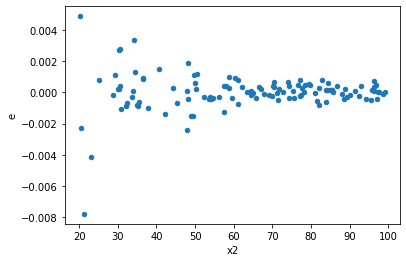

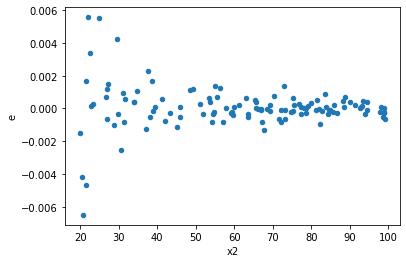

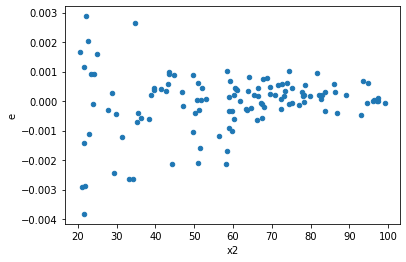

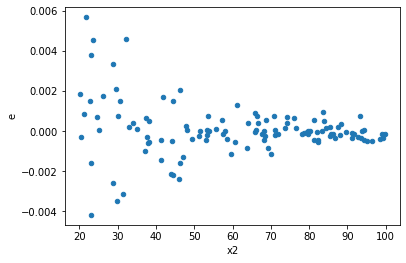

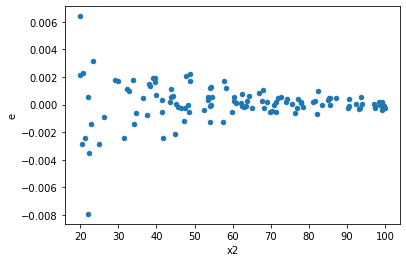

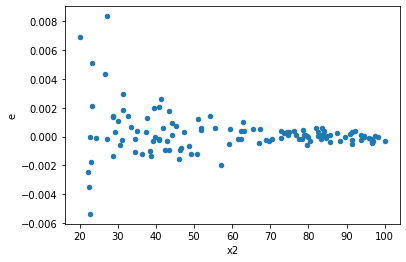

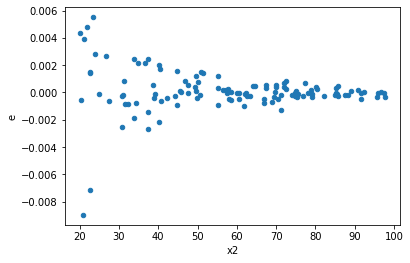

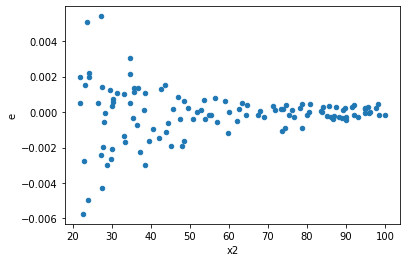

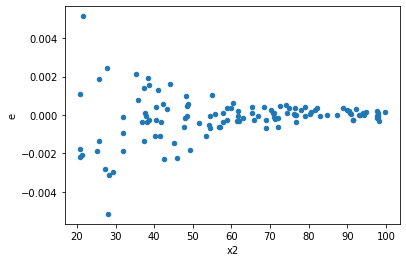

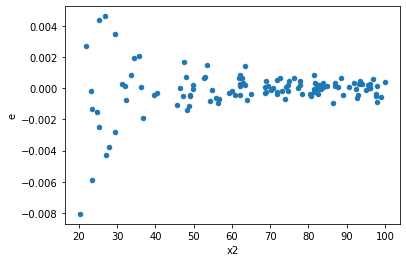

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,0.00014851400654960253,6.91862691630489e-06,3.228565359773968e-06,1.5040493296314978e-07,0.04658568627326152,2.5965981819400054e-19,Reject005=0 : Heteroscedasticity
1.0,46.0,46.0,0.00019087078965711345,1.1377733549128663e-05,4.149364992545945e-06,2.4734203367671003e-07,0.05960961113834126,4.3709375065376966e-17,Reject005=0 : Heteroscedasticity
2.0,46.0,46.0,8.340887495561218e-05,1.6295168009299106e-05,1.8132364120785257e-06,3.5424278281085014e-07,0.1953649179175589,1.5907391096584097e-07,Reject005=0 : Heteroscedasticity
3.0,46.0,46.0,0.00013079065790650438,2.1509896526031168e-05,2.84327517188053e-06,4.6760644621806886e-07,0.16446049641716387,9.53361263409137e-09,Reject005=0 : Heteroscedasticity
4.0,46.0,46.0,0.00019172085434641576,1.1474209363711042e-05,4.16784465970469e-06,2.494393339937183e-07,0.05984851988494987,4.744846882417117e-17,Reject005=0 : Heteroscedasticity
5.0,46.0,46.0,0.00023267515037794515,1.9486519451703646e-05,5.058155442998808e-06,4.23619988080514e-07,0.08374989516521544,4.044412353388596e-14,Reject005=0 : Heteroscedasticity
6.0,46.0,46.0,0.0002622114175489757,2.9526556177927205e-05,5.700248207586428e-06,6.418816560418957e-07,0.1126059134034934,1.156044773922403e-11,Reject005=0 : Heteroscedasticity
7.0,46.0,46.0,0.00016782483632872666,2.049073206158025e-05,3.648366007146232e-06,4.4545069699087496e-07,0.1220959454501958,5.120937846929125e-11,Reject005=0 : Heteroscedasticity
8.0,46.0,46.0,8.96978437693688e-05,6.687856975137849e-06,1.949953125421061e-06,1.4538819511169236e-07,0.07455984106299894,4.058556421936497e-15,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    995
Reject005=1 : Homoscedasticity        5
Name: Result_test, dtype: int64